## EE-361M Introduction to Data Mining
## Assignment #2
## Due: Thursday, Feb 18, 2016 by 2pm; Total points: 50


Your homework should be written in a **Jupyter notebook** (if this isn't possible, let me know). Please use this naming format for your notebook you submit: **Group(Group Num)_HW(HW Number).ipynb**. For example, Group1_HW1.ipynb. Homeworks are due at the beginning of class on the due date and should be submitted through Canvas in your **groups of 3 from the first homework**. If groups need to be adjusted please contact the TA.

In [2]:
#Imports
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from __future__ import division
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

ImportError: No module named requests

## Question 1: Sampling
### 10 points

1. CBS has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a 'black and white age'). CBS wants to estimate what fraction $p$ of its audience like the show by 'randomly' calling $n$ viewers and tallying their responses so as to estimate the true value of $p$ to a fractional  accuracy of within $\pm \epsilon$%, with a confidence of $(1-\alpha) \times 100$%. For $\alpha =  0.1$, $\epsilon = 0.02$ (i.e. your answer will be $\hat{p} \pm 0.02$), what is the minimum value of $n$ needed if (i) true value $p = 0.5$ and (ii) $p = 0.95$? 
%(First try to do this yourself knowing that you have a binomial distribution, which can be approximated by a normal distribution. If you cannot, consult an undergrad stats book.)
2. Suppose for a certain value  of $p$ and choice of $\epsilon$, you calculate that you will need (at least) 1000 samples for $\alpha = 0.1$. You now decide to obtain  a more accurate answer by either (i) reducing $\alpha$ to 0.05, keeping the same $\epsilon$ or by (ii) reducing $\epsilon$ by a factor of 2 from the original value, but maintaining  $\alpha = 0.1$.  In each case how many samples would you need now?

## Question 2: Republican Presidental Debate
### 10 points

In this question we will be analyzing text data from one of the recent presidental debates. I have included code below to grab the data for you from the New York Times.

1. Create a set of the frequency of utterance of  all the distinct words spoken by candidates, and then use it to create a histogram (with 30 bins) of word counts. Thus a bin is a range of count values and the corresponding "y" value is the number of words whose count falls in this range. What is interesting about this distribution? What are the 10 most common words?
2. Remove the 100 most common words from vocabulary. Meaning that if you ever see this word, get rid of it. Now create a new python dictionary for each candidate that is a single list of all the words spoken by this candidate (ignoring these most common words). What are the 10 most common words for Trump, Rubio, and Cruz? How do their words differ?
3. Using our dictionary from number 2, how many words did each speaker speak? Who spoke the most? Who is the outlier?
4. Count the percentage of time each person uses the words (I, I'm, me, mine). When doing this convert all words to lower case. Create a bar plot of this percentage for each candidate with bars from largest to smallest. Use dictionary that has all words (doesn't exclude most common). What does the plot show?

Hints:
1. Look at python Counter.
2. Just split text on a space. This isn't perfect, but will be fine.

In [120]:
url = 'http://www.nytimes.com/2015/11/11/us/politics/transcript-republican-presidential-debate.html'
# requests gets the source code from the url and extracts it as text
html = requests.get(url).text
# beautifulsoup is a library that takes in text source code and returns a structured format of that
# source code that you can more easily search and parse.
soup = BeautifulSoup(html, 'html5lib')
# get all the 'p' tags from the source with class = 'story-body-text'
# this was determined by looking at the source code
# the first and last paragraphs are intro and ending
paragraphs = soup('p', {'class': 'story-body-text'})[1:-1]
candidates = ['BUSH', 'TRUMP', 'RUBIO', 'CARSON', 'FIORINA', 'KASICH', 'CRUZ', 'PAUL']
def text_to_dict(paragraph_array):
    '''takes an array of text paragraphs from debate and returns dict 
    where key is person and value is list of text spoken by that candidate'''
    # dict is like a hash map. defaultdict lets you specify what types of values will be in your hash map
    d = defaultdict(list)
    # just a default speaker that won't end up in our returned data
    # will get replaced when an actual speaker is found
    speaker = "<START>"
    for paragraph in paragraph_array:
        words = paragraph.text.split(' ')
        for word in words: #this doesn't seem to work
            if word.endswith(".") or word.endswith(","):
                word=word[:-1]
        first_word = words[0] # only new speaker when have SPEAKER: format
        if first_word[-1] == ":":
            speaker = first_word[:-1]
        
        if speaker in candidates: # only keep candidates text
            d[speaker].append(words[1:])
    return d


speaker_dict = text_to_dict(paragraphs)

10 Most common words are:
the:	775
to:	508
a:	365
of:	360
and:	352
we:	267
that:	261
is:	258
in:	254
I:	232

The interesting thing about the data is that the vast majority of words occur between 
0 and 30 times in the whole dataset, decaying sharply and exponentially. When examining the data, 
it becomes clear that common English words such as "the" and "to" occur at a much higher frequency 
than most other words, which mostly occur around 0 to 30 times.


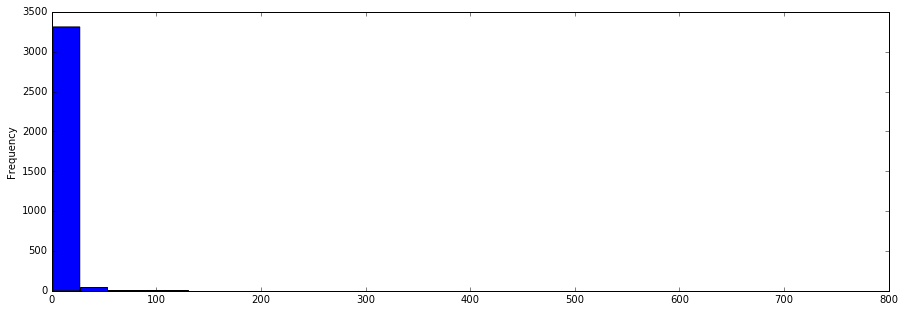

In [172]:
#part 1
#Create a set of the frequency of utterance of all the distinct words spoken by candidates, and then use it to 
#create a histogram (with 30 bins) of word counts. Thus a bin is a range of count values and the corresponding 
#"y" value is the number of words whose count falls in this range. What is interesting about this distribution? 
#What are the 10 most common words?
word_array = []

for person in speaker_dict:
    for paragraph in speaker_dict[person]:
        for word in paragraph:
            word_array.append(word)

c = Counter(word_array)
arr = []
k,v = zip(*c.items())
for num in v:
    arr.append(num);

s = pd.Series(arr)
s.plot(kind="hist", figsize=(15, 5),bins=30)

print "10 Most common words are:"
c10 = c.most_common(10)
for word, count in c.most_common(10):
    print '%s:\t%d' % (word, count)
    
print """\nThe interesting thing about the data is that the vast majority of words occur between 
0 and 30 times in the whole dataset, decaying sharply and exponentially. When examining the data, 
it becomes clear that common English words such as "the" and "to" occur at a much higher frequency 
than most other words, which mostly occur around 0 to 30 times."""

In [136]:
#part 2
#Remove the 100 most common words from vocabulary. Meaning that if you ever see this word, get rid of it. 
#Now create a new python dictionary for each candidate that is a single list of all the words spoken by this 
#candidate (ignoring these most common words). What are the 10 most common words for Trump, Rubio, and Cruz? 
#How do their words differ?

c2 = Counter(word_array) #removing top 100
c100most = c2.most_common(100)
for k,v in c100most:
    if k in c2:
        del c2[k]

new_speaker_dict=defaultdict(list)
for person in speaker_dict:
    for paragraph in speaker_dict[person]:
        for word in paragraph:
            if c2[word] != 0:
                if word.endswith(".") or word.endswith(","): #removing some punctuation
                    word=word[:-1]
                new_speaker_dict[person].append(word)

trumpcount = Counter(new_speaker_dict[u'TRUMP'])
rubiocount = Counter(new_speaker_dict[u'RUBIO'])
cruzcount  = Counter(new_speaker_dict[u'CRUZ'])
print "Trump:"
for word, count in trumpcount.most_common(10): print '%d\t%s' % (count, word)
    
print "\nRubio:"
for word, count in rubiocount.most_common(10): print '%d\t%s' % (count, word)
    
print "\nCruz:"
for word, count in cruzcount.most_common(10):  print '%d\t%s' % (count, word)

print """\nTrump talks a lot about people (presumably foreigners and aliens) coming into the country. Rubio
focuses more on economy and apparently likes the phrase "21st century".  Cruz has a lot to say about taxes."""

Trump:
21	country
9	ever
9	come
9	in
6	tell
6	better
6	deals
6	nobody
6	countries
6	jobs

Rubio:
12	world
11	century
10	ever
9	job
9	important
8	new
8	economy
7	21st
7	America
7	most

Cruz:
11	Washington
9	which
9	economic
9	business
8	tax
8	IRS
8	growth
7	that
7	plan
7	her

Trump talks a lot about people (presumably foreigners and aliens) coming into the country. Rubio
focuses more on economy and apparently likes the phrase "21st century".  Cruz has a lot to say about taxes.


In [123]:
#part 3
#Using our dictionary from number 2, how many words did each speaker speak? Who spoke the most? Who is the outlier?
for speaker in new_speaker_dict:
    print '%s\twordcount:\t%d' % (speaker, len(new_speaker_dict[speaker]))
    
print """\nCruz is the most verbose, narrowly beating Rubio 1131 to 1124. Most candidates spoke around 1000 words,
with the exception of Carson, who came in at a terse 679 words. """

TRUMP	wordcount:	984
RUBIO	wordcount:	1124
CARSON	wordcount:	679
FIORINA	wordcount:	1000
BUSH	wordcount:	972
KASICH	wordcount:	1099
CRUZ	wordcount:	1131
PAUL	wordcount:	828

Cruz is the most verbose, narrowly beating Rubio 1131 to 1124. Most candidates spoke around 1000 words,
with the exception of Carson, who came in at a terse 679 words. 


TRUMP's possessive usage percentage:	2.625182%
RUBIO's possessive usage percentage:	1.410859%
CARSON's possessive usage percentage:	2.415144%
FIORINA's possessive usage percentage:	1.755292%
BUSH's possessive usage percentage:	0.883117%
KASICH's possessive usage percentage:	2.567394%
CRUZ's possessive usage percentage:	1.196503%
PAUL's possessive usage percentage:	1.991798%

There was a clustering at around 2.5% (Trump, Kasich, Carson) but was otherwise somewhat evenly
distributed throughout 0.88% to 2.5%


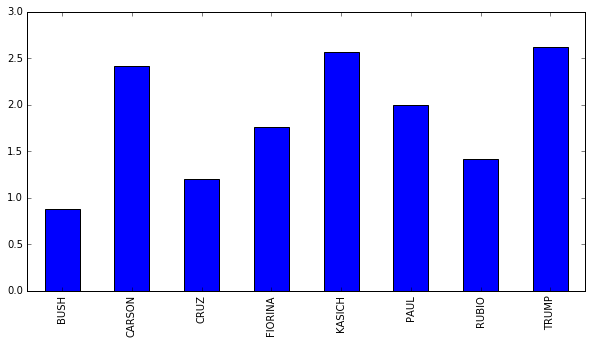

In [140]:
#part 4
#Count the percentage of time each person uses the words (I, I'm, me, mine). When doing this convert all words 
#to lower case. Create a bar plot of this percentage for each candidate with bars from largest to smallest. Use 
#dictionary that has all words (doesn't exclude most common). What does the plot show?

new_new_speaker_dict=defaultdict(list)
for person in speaker_dict:
    for paragraph in speaker_dict[person]:
        for word in paragraph:
            if word.endswith(".") or word.endswith(","): #removing some punctuation
                word=word[:-1]
            new_new_speaker_dict[person].append(word.lower())

first_person_dict = {}
for speaker in new_new_speaker_dict:
    c = Counter(new_new_speaker_dict[speaker])
    wordcount = len(new_new_speaker_dict[speaker])
    first_person_sum = c["i"] + c[u"i’m"] + c["me"] + c["mine"]
    percentage = 100*(first_person_sum / wordcount)
    print "%s's possessive usage percentage:\t%f%%" % (speaker, percentage)
    first_person_dict[speaker] = percentage

s2 = pd.Series(first_person_dict)
s2.plot(kind="bar", figsize=(10, 5))

print """\nThere was a clustering at around 2.5% (Trump, Kasich, Carson) but was otherwise somewhat evenly
distributed throughout 0.88% to 2.5%"""

## Queston 3: Principal Component Analysis
### 15 points

In this question, you will explore an application of PCA.

1. Convert your data from 3.2 to a vectorized format. This means you will have a row for each candidate and a column for each word in your data. A column for a candidate will contain the number of times that candidate used that word. Use [CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html) from sklearn with min_df = 1.
2. Convert your data from a sparse matrix to a dense array using .toarray() and then scale it to have mean zero and standard deviation of 1. See [here](http://scikit-learn.org/stable/modules/preprocessing.html) for help.
2. Plot the explained variance as a function of the number of PCA components (called a scree plot). Use sklearn's PCA functionality to do this.
3. Now pick the top two principal components and project the data onto the respective dimensions. Visualize the data in a scatter plot and label each point with the candidate's name. Who are the outliers? Use sklearn and matplotlib for this. 
4.  In what sense is PCA an optimal feature extraction technique? Describe a situation where you would prefer feature selection to (linear) feature extraction, even though the former  is a special case of the latter.

In [231]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.decomposition import PCA

#question 3 part 1, part 2
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(new_speaker_dict).toarray()
X_scaled = preprocessing.scale(X)

#part 3
#Plot the explained variance as a function of the number of PCA components (called a scree plot). 
#Use sklearn's PCA functionality to do this.
#pca = PCA(n_components=3)
pca = PCA()
pca.fit(X_scaled.T)
pca_score = pca.explained_variance_ratio_
V = pca.components_
#print pca_score
print X_scaled.T[0]
#print V[0][0:5]
#print V.T[0:5]

#part 4
#Now pick the top two principal components and project the data onto the respective dimensions. 
#Visualize the data in a scatter plot and label each point with the candidate's name. 
#Who are the outliers? Use sklearn and matplotlib for this.
#"TRUMP"
#"RUBIO"
#"CARSON"
#"FIORINA"
#"BUSH"
#"KASICH"
#"CRUZ"
#"PAUL"

#fig = plt.figure(fig_num, figsize=(4, 3))
#plt.clf()
#ax = Axes3D(fig, rect=[0, 0, .95, 1])

#ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker='+', alpha=.4)
#Y = np.c_[a, b, c]

[-0.37796447 -0.37796447 -0.37796447 -0.37796447  2.64575131 -0.37796447
 -0.37796447 -0.37796447]


C:\Users\Charlie\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [213]:
#part 5
#In what sense is PCA an optimal feature extraction technique? Describe a situation where you would prefer 
#feature selection to (linear) feature extraction, even though the former is a special case of the latter.
print "Problem 3 part 5"
print """PCA essentially remaps each data point to a particular subspace within the data's original dimensions, extracting 
features from that data point's position in each dimension to do so. Feature selection would be preferred over
linear feature extraction if the analysis does not need all or most of the features, but instead requires deep 
analysis on a few specific features of the data."""

Problem 3 part 5
PCA essentially remaps each data point to a particular subspace within the data's original dimensions, extracting 
features from that data point's position in each dimension to do so. Feature selection would be preferred over
linear feature extraction if the analysis does not need all or most of the features, but instead requires deep 
analysis on a few specific features of the data.


## Question 4: Robust Regression
### 5 points

In this question we will be exploring using a regression technique that is more robust to outliers. I provide some code below that injects outlier points into the original medv and lstat data from the housing dataset. This problem looks into how robust regression can help in the presence of outliers.

1. Using the original data, plot lstat on the x-axis and log(medv) on the y-axis of a scatter plot with the line of best fit from a linear regression on the plot as well. Do the same, but with the data that includes the outlier values. What changes with the best fit line? Specifically, how does the slope change?
2. Now run a linear regression with a Huber loss on the data including the outliers and create the same plot as above, but this time with the fit from the Huber loss regression (using all the data). What has changed (comment on the slope as well)? Note: Use SGDRegressor from sklearn with 500 iterations and no penalty.
3. Explain why the huber loss is more robust to outliers.

Note:  Use plot's with xlim = (-5, 40) and ylim = (1, 5). These set the range for the x any y axes.

Part 1



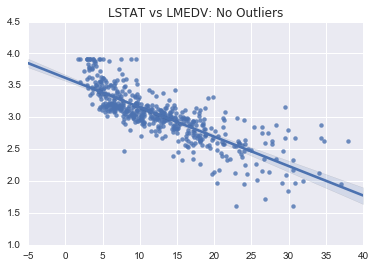


Slope = [[-0.04608043]]


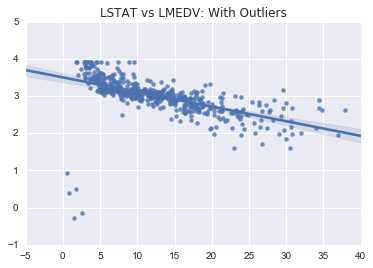


Slope = [[-0.03923745]]

The outliers make the slope less negative by a noticeable amount. It makes it "flatter".


Part 2


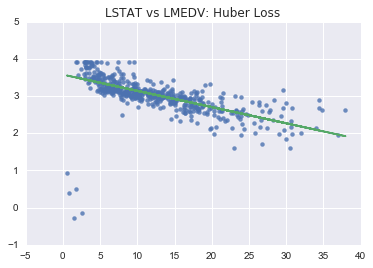


Slope = [-0.04358077]

The Huber Loss fit is much closer to the fit of the data without outliers. This is shown by the slope of the line.


In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

housing_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",
                   delim_whitespace=True, header=None,
                   names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                           'B', 'LSTAT', 'MEDV'])
housing_data = housing_data.dropna()
lstat = housing_data.LSTAT.values
medv = housing_data.MEDV.values
medv_std = np.std(medv)
lstat_std = np.std(lstat)
np.random.seed(42)
medv_outliers = np.random.normal(1, 1, 5)
lstat_outliers = np.random.normal(1, 1, 5)
medv_with_outliers = np.append(medv, medv_outliers)
lstat_with_outliers = np.append(lstat, lstat_outliers)

# Part 1
lmedv = np.log(medv)
lmedv_with_outliers = np.log(medv_with_outliers)
linReg = linear_model.LinearRegression()
linReg.fit(lstat.reshape(-1, 1), lmedv.reshape(-1, 1))
coef = linReg.coef_

print 'Part 1\n'

sns.regplot(lstat, lmedv)
plt.title('LSTAT vs LMEDV: No Outliers')
plt.show()

print '\nSlope = ' + str(coef)

linReg = linear_model.LinearRegression()
linReg.fit(lstat_with_outliers.reshape(-1, 1), lmedv_with_outliers.reshape(-1, 1))
coef = linReg.coef_

sns.regplot(lstat_with_outliers, lmedv_with_outliers)
plt.title('LSTAT vs LMEDV: With Outliers')
plt.show()

print '\nSlope = ' + str(coef)

print '\nThe outliers make the slope less negative by a noticeable amount. It makes it "flatter".\n\n\nPart 2'

# Part 2

hReg = linear_model.SGDRegressor(loss="huber", n_iter=500)
hReg.fit(lstat_with_outliers.reshape(-1, 1), lmedv_with_outliers)
coef = hReg.coef_

sns.regplot(lstat_with_outliers, lmedv_with_outliers, fit_reg=False)
plt.plot(lstat_with_outliers, hReg.predict(lstat_with_outliers.reshape(-1, 1)))
sns.set_style("darkgrid")
plt.title('LSTAT vs LMEDV: Huber Loss')
plt.show()
print '\nSlope = ' + str(coef)

print '\nThe Huber Loss fit is much closer to the fit of the data without outliers. This is shown by the slope of the line.'


Part 3

Linear regression using means squared loss can be performed easily and is very simple. It is very heavily influenced by outliers, however, with a relatively small number of points adding significantly to the total variance of the system. Huber loss is much more resistant to outliers because it splits the calculation of loss into two segments. Huber loss is quadratic for small residuals and linear for large residuals. This gives outliers much less weight in the total variance or loss of the system, which allows a fit using Huber loss to be better at handling a few outliers.

# Question 5: Visualization using Bokeh
## 10 points

In this problem, you'll build an interactive visualization. Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. For more information on Bokeh, see http://bokeh.pydata.org/en/latest/. The problem statement is as follows:

Using the [auto-mpg](http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original) data, your goal is to build a Bokeh visualization which allows the user explore how MPG varies with horsepower and weight. You will create a visualization that allows the user to toggle the Y axis of a scatter plot between horsepower and weight. With the x-axis always being MPG.

Hints: 
1. You can make use of Select widgets.
2. See: http://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html#javascript-callbacks. Specifically look at the CustomJS for Widgets under Callbacks and the Select widget. 
3. See: http://bokeh.pydata.org/en/latest/docs/reference/plotting.html. Look for the scatter API.
4. See: http://bokeh.pydata.org/en/0.10.0/docs/user_guide/styling.html#labels. For labeling axes.
5. Use output_notebook() from Bokeh to output the plot to your notebook

We have made available a sample screenshot of our Bokeh app that supports the above requirements. Your interface should look similar to the screenshots.

In [4]:
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import urllib2

output_notebook()
data = urllib2.urlopen("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original")

#building the arrays used to scatter plotting
MPGList = []
horsepowerList =[]
weightList = []
carsList = data.readlines()


#populating said arrays with revelant data
#for a given split line that is already space-delimited,
#index 0 is the MPG, index 3 is horsepower and index 4 is weight
for x in range(len(carsList)):
    command = carsList[x].split() #takes a line, and breaks it into a list of single words
    #must filter out NA data
    if command[0].isalpha() != True and command[3].isalpha() != True and command[4].isalpha() != True :
        MPGList.append(float(command[0]))
        horsepowerList.append(float(command[3]))
        weightList.append(float(command[4]))
        
data.close()
        

#time for the scatter plotting our data
#MPG and horsepower plot
p1 = figure(plot_width=800, plot_height=500, title="MPG Vs. Horsepower")
p1.scatter(MPGList, horsepowerList, color="blue")

p1.xaxis.axis_label = "MPG"
p1.xaxis.axis_label_text_color = "weight"

p1.yaxis.axis_label = "Horsepower"
p1.yaxis.axis_label_text_color = "green"



#MPG and weight plot
p2 = figure(plot_width=800, plot_height=500, title="MPG Vs. Weight")
p2.scatter(MPGList, weightList, color="blue")

p2.xaxis.axis_label = "MPG"
p2.xaxis.axis_label_text_color = "purple"

p2.yaxis.axis_label = "Weight"
p2.yaxis.axis_label_text_color = "green"

#other work needed to display
#read: not sure why or how this works
tab1 = Panel(child=p1, title="Horsepower Plot")
tab2 = Panel(child=p2, title="Weight Plot")
tabs = Tabs(tabs=[ tab1, tab2 ])
show(tabs)




Loading BokehJS ...